<a href="https://colab.research.google.com/github/siddu541/Analytics/blob/master/KNN_Classfier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
  X = [[0], [1], [2], [3]]
  y = [0, 0, 1, 1]
  from sklearn.neighbors import KNeighborsClassifier
  neigh = KNeighborsClassifier(n_neighbors=3)
  neigh.fit(X, y) 
  print(neigh.predict([[1.1]]))
  print(neigh.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors

In [0]:
from matplotlib.colors import ListedColormap



def knn_comparison(data, n_neighbors = 15):
    '''
    This function finds k-NN and plots the data.
    '''
    X = data[:, :2]
    y = data[:,2] 
    
    
    # grid cell size
    h = .02
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])


    # the core classifier: k-NN
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # we create a mesh grid (x_min,y_min) to (x_max y_max) with 0.02 grid spaces
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # we predict the value (either 0 or 1) of each element in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # xx.ravel() will give a flatten array

    # np.c_ : Translates slice objects to concatenation along the second axis.
    # > np.c_[np.array([1,2,3]), np.array([4,5,6])]
    # > array([[1, 4],
    #          [2, 5],
    #          [3, 6]])   (source: np.c_ documentation)
    
    
    
    
    # convert the out back to the xx shape (we need it to plot the decission boundry)
    Z = Z.reshape(xx.shape)
    
    
    # pcolormesh will plot the (xx,yy) grid with colors according to the values of Z
    # it looks like decision boundry
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
   
    # scatter plot of with given points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    
    #defining scale on both axises
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
   
    # set the title
    plt.title('K value = '+str(n_neighbors))
    

    plt.show()

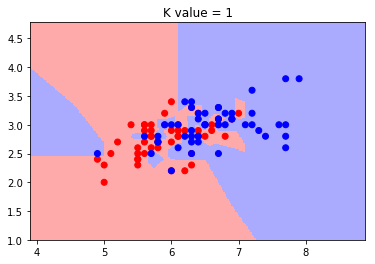

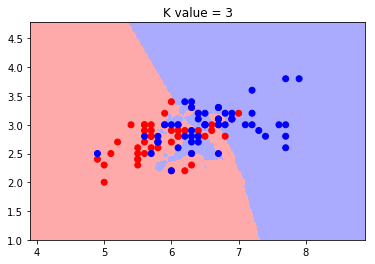

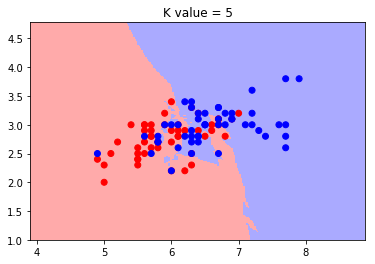

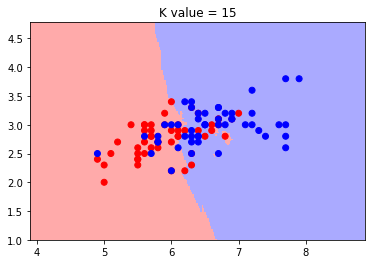

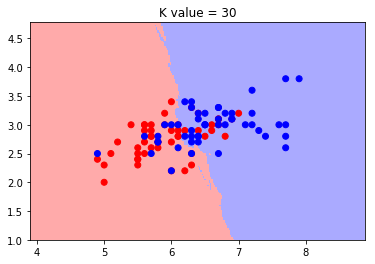

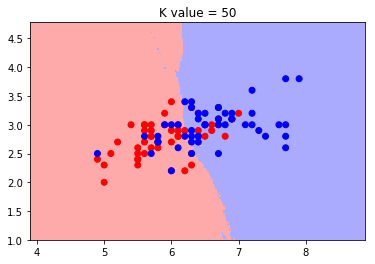

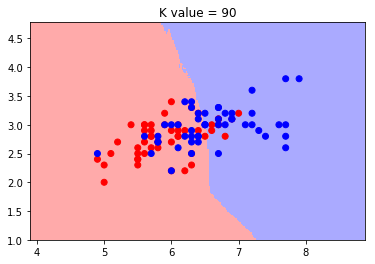

In [19]:
data = np.genfromtxt('/content/6.overlap.csv', delimiter=',')
knn_comparison(data, 1)
knn_comparison(data, 3)
knn_comparison(data, 5)
knn_comparison(data,15)
knn_comparison(data, 30)
knn_comparison(data, 50)
knn_comparison(data, 90)


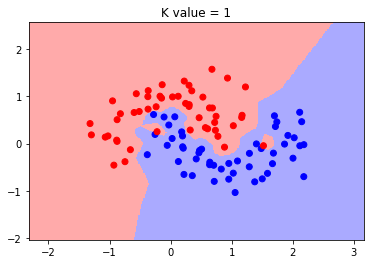

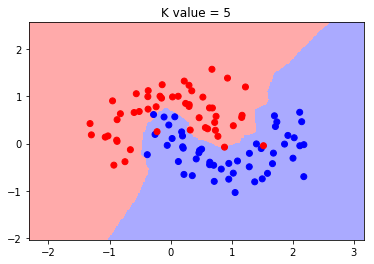

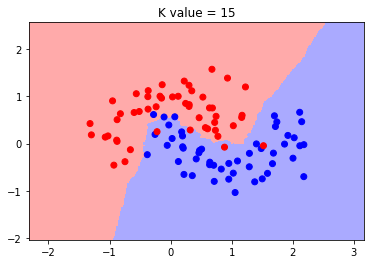

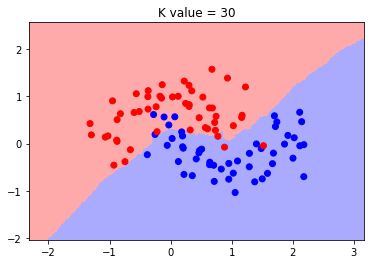

In [20]:
data = np.genfromtxt('/content/1.ushape.csv', delimiter=',')
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data,15)
knn_comparison(data,30)
